In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from statistics import mode
warnings.filterwarnings('ignore')

### Importing Dataset and retrieving five first rows

In [2]:
dataframe = pd.read_csv('student_habits_performance.csv')
dataframe.head()

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


In [4]:
dataframe['parental_education_level'].isna().sum()

np.int64(91)

In [5]:
dataframe['parental_education_level'].fillna( value=mode(dataframe['parental_education_level']), inplace=True)

dataframe['parental_education_level'].isna().sum()

np.int64(0)

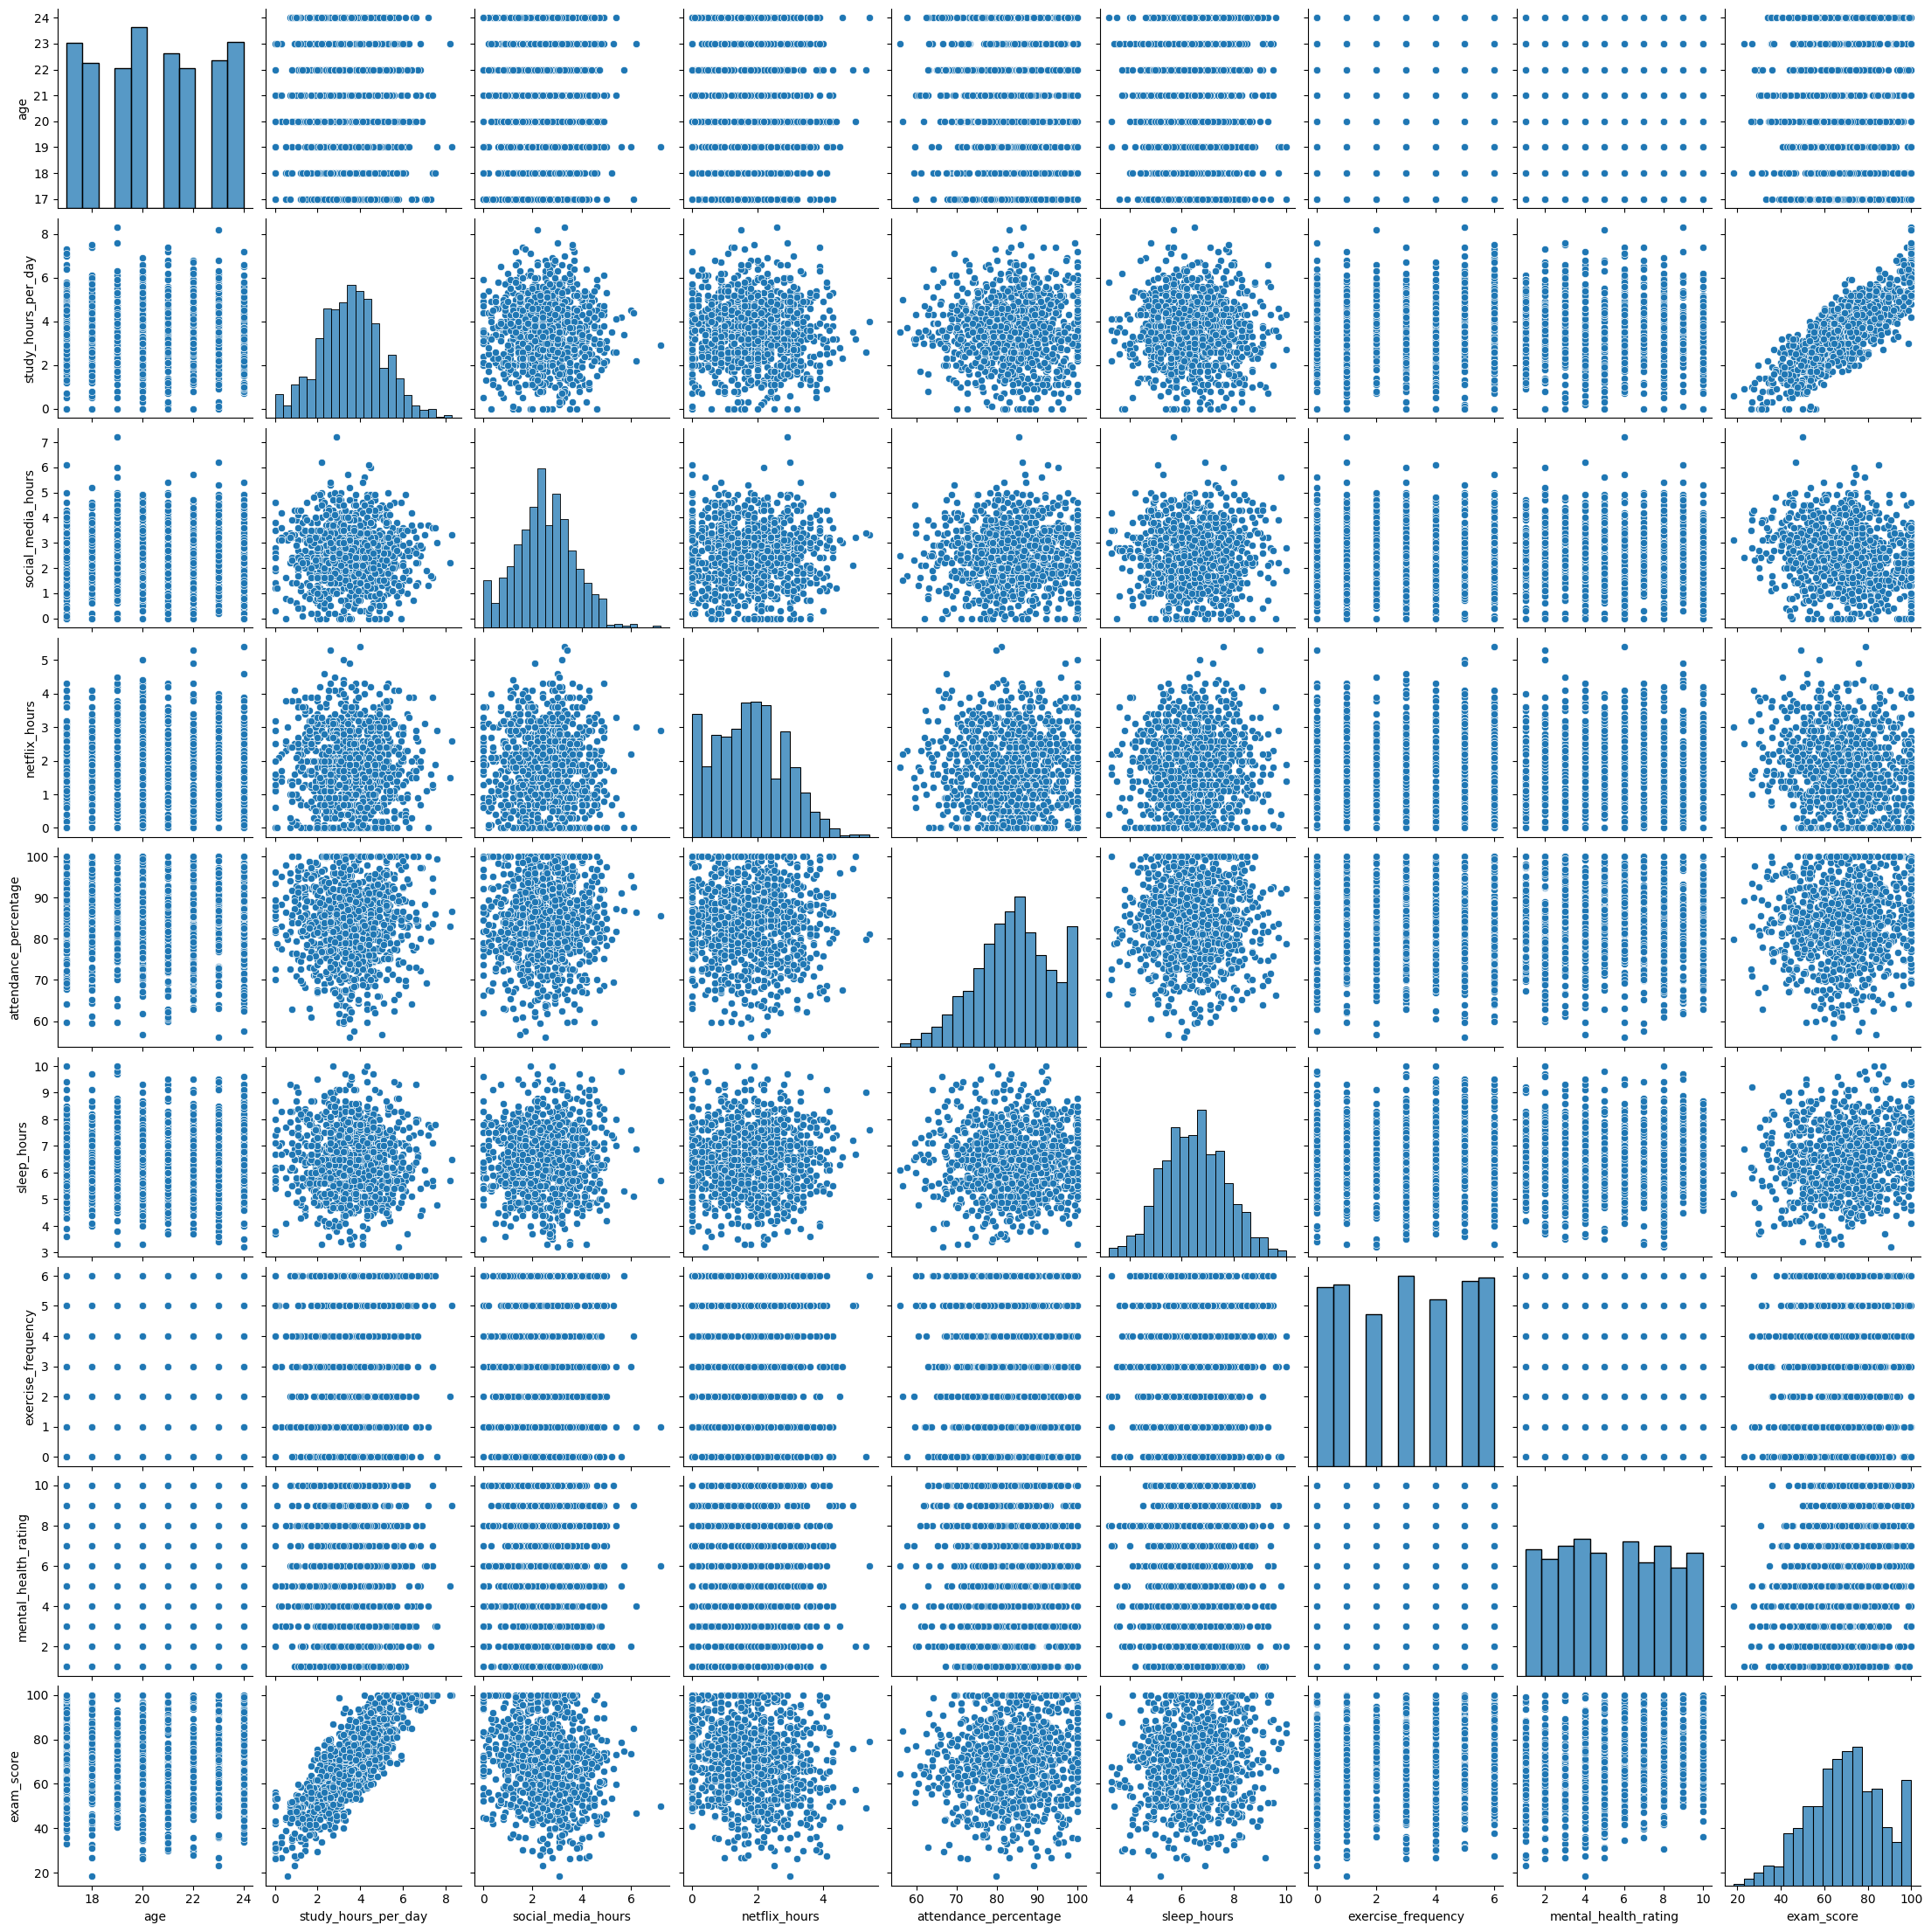

In [8]:
sns.pairplot(dataframe)
plt.savefig('pairplot.png' , dpi=1000)

In [9]:
dataframe['exam_score'].isna().sum()

np.int64(0)

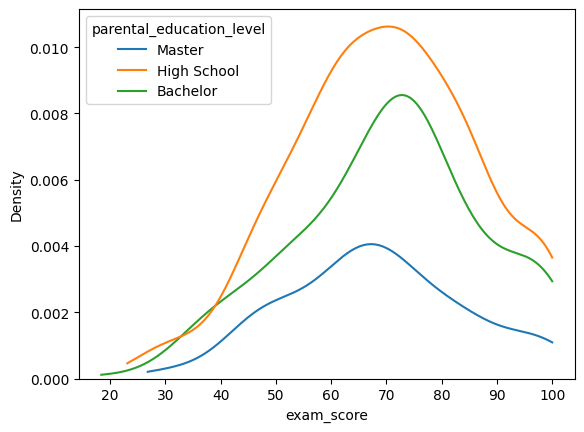

In [12]:
sns.kdeplot(data=dataframe , x='exam_score' , hue='parental_education_level' , cut=0)
plt.savefig('kde.png' , dpi=700)

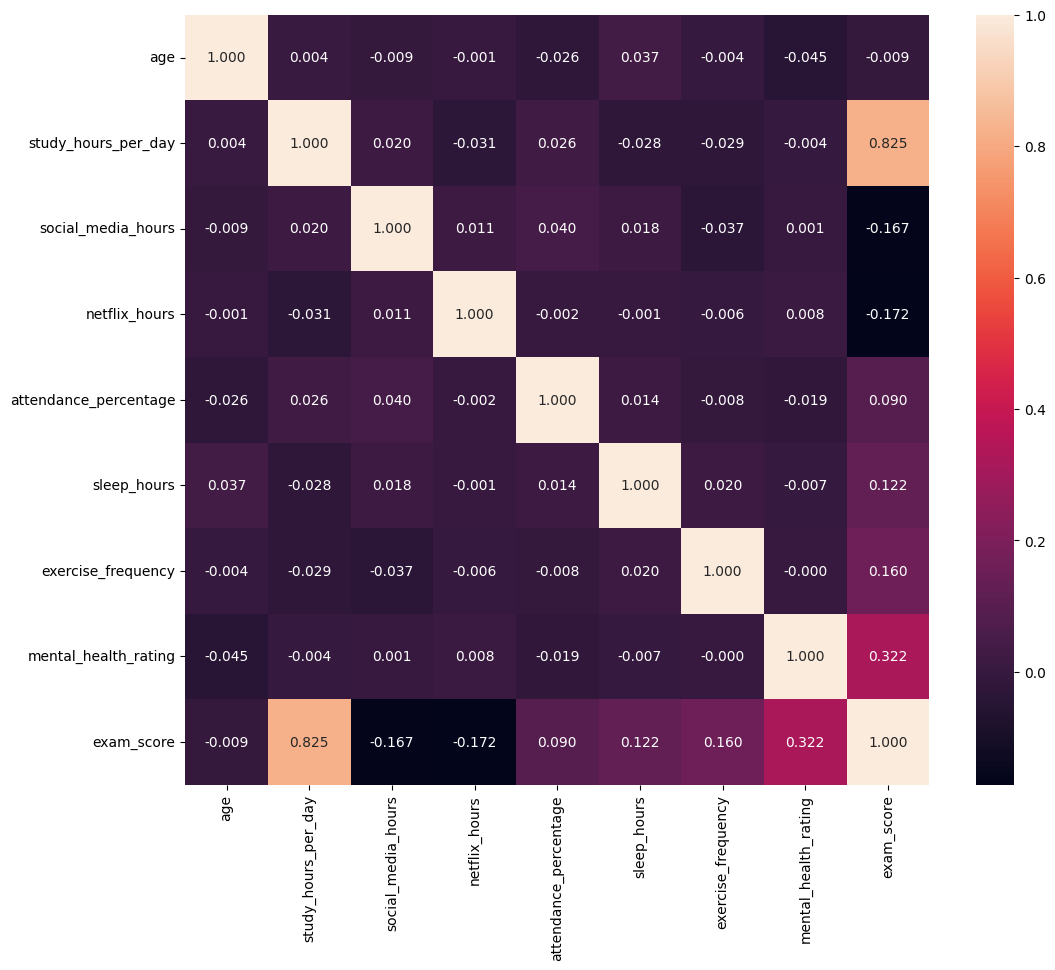

In [16]:
plt.figure(figsize=(12, 10))
sns.heatmap(dataframe.corr(numeric_only=True) , annot=True , fmt=".3f")
plt.savefig('heatmap.png' )

In [17]:
cleaned_dataframe = pd.read_csv('student_habits_cleaned.csv')

cleaned_dataframe.head(10)

,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score,performance_category
0,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2,Average Performer
1,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0,High Performer
2,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3,Low Performer
3,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8,Low Performer
4,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4,Average Performer
5,24,Male,7.2,1.3,0.0,No,82.9,7.4,Fair,1,Master,Average,4,No,100.0,High Performer
6,21,Female,5.6,1.5,1.4,Yes,85.8,6.5,Good,2,Master,Poor,4,No,89.8,High Performer
7,21,Female,4.3,1.0,2.0,Yes,77.7,4.6,Fair,0,Bachelor,Average,8,No,72.6,Average Performer
8,23,Female,4.4,2.2,1.7,No,100.0,7.1,Good,3,Bachelor,Good,1,No,78.9,High Performer
9,18,Female,4.8,3.1,1.3,No,95.4,7.5,Good,5,Bachelor,Good,10,Yes,100.0,High Performer


In [18]:
cleaned_dataframe.shape

(1000, 16)

In [19]:
dataframe.shape

(1000, 16)

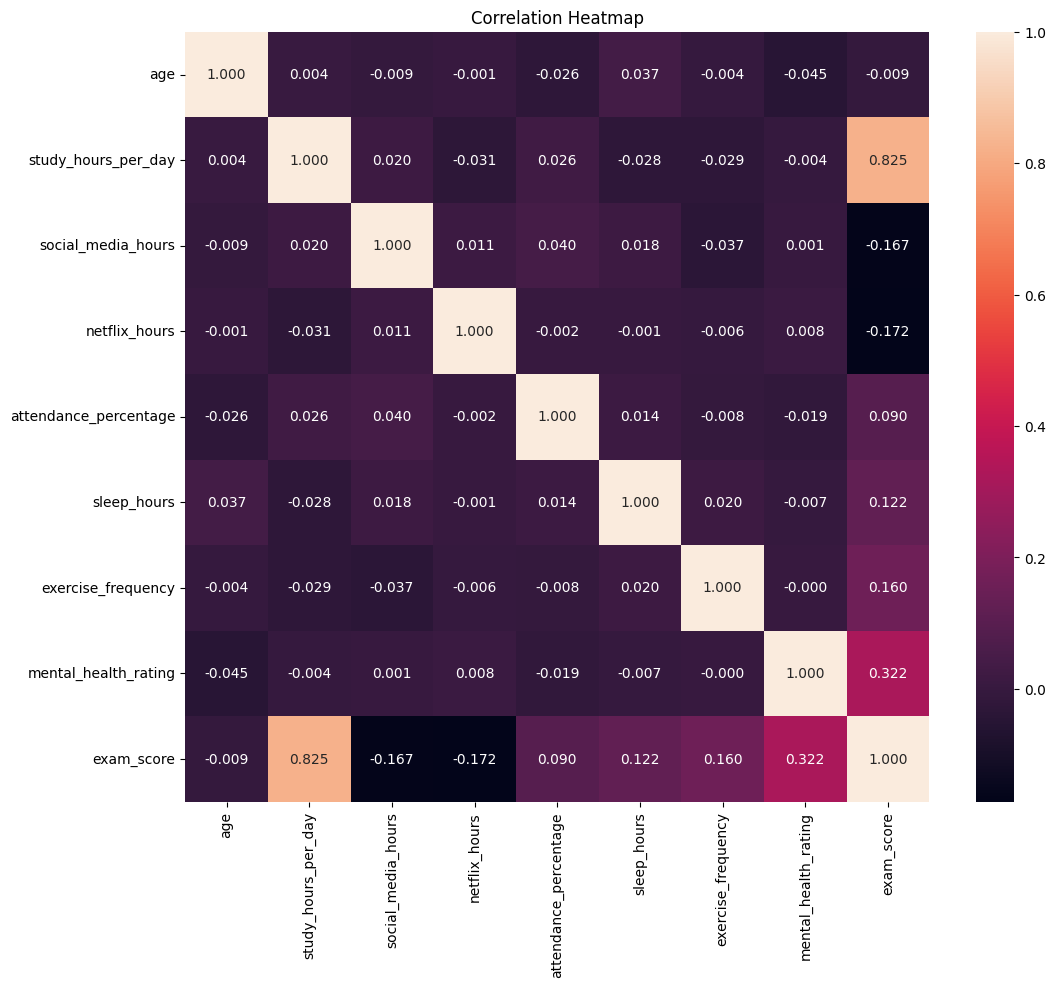

In [21]:
plt.figure(figsize=(12, 10))
ax = sns.heatmap(cleaned_dataframe.corr(numeric_only=True) , annot=True , fmt=".3f")
ax.set_title('Correlation Heatmap')
plt.savefig('heatmap.png' )

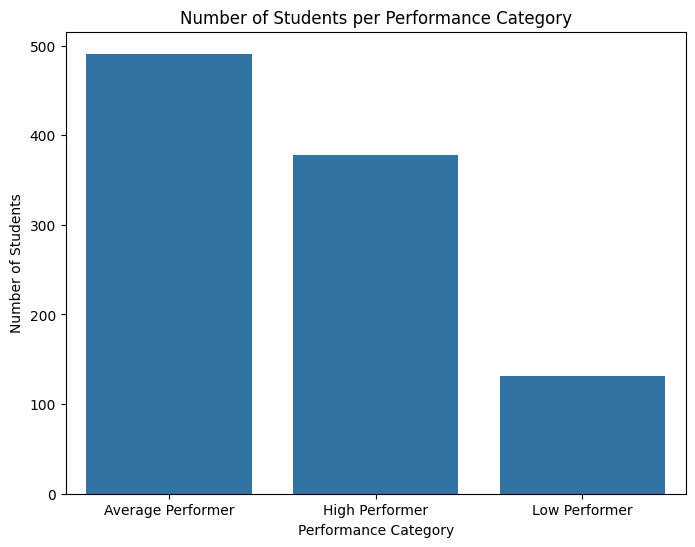

In [24]:
plt.figure(figsize=(8, 6))  # Optional: adjust size
sns.countplot(data=cleaned_dataframe, x='performance_category')
plt.title("Number of Students per Performance Category")
plt.xlabel("Performance Category")
plt.ylabel("Number of Students")
plt.savefig('student-performance-count.png', dpi=800)

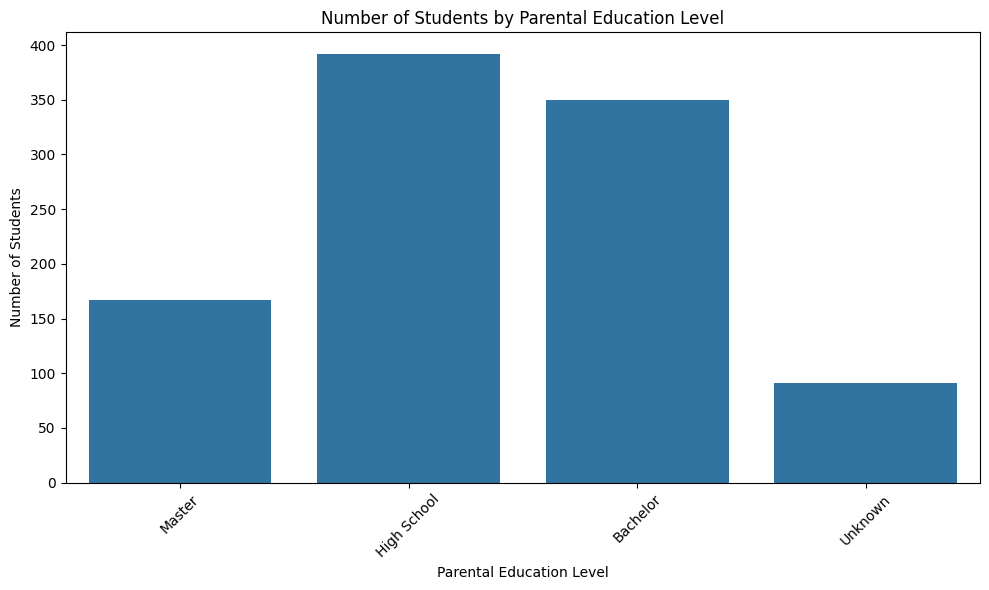

In [25]:
plt.figure(figsize=(10, 6))
sns.countplot(data=cleaned_dataframe, x='parental_education_level')
plt.title("Number of Students by Parental Education Level")
plt.xlabel("Parental Education Level")
plt.ylabel("Number of Students")
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.tight_layout()
plt.savefig('student-parental-education.png', dpi=1000)

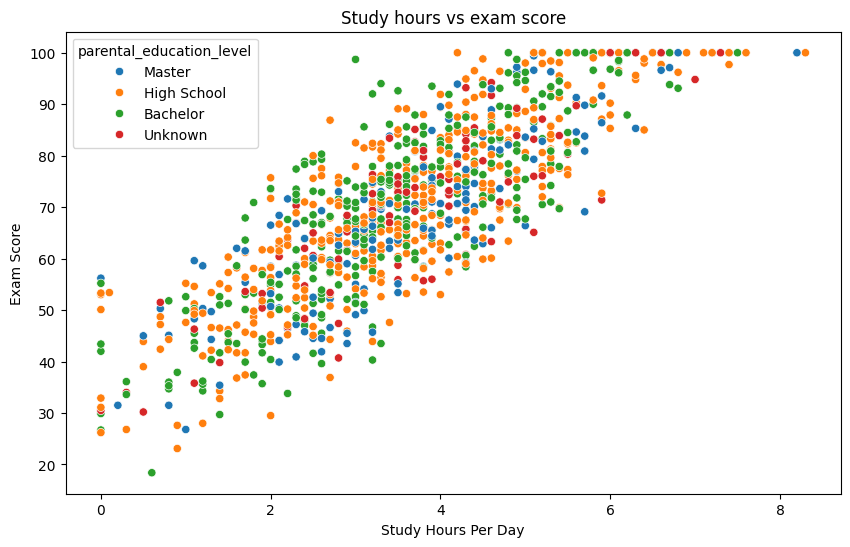

In [41]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=cleaned_dataframe, x='study_hours_per_day' , y='exam_score' , hue='parental_education_level')
plt.title("Study hours vs exam score")
plt.xlabel("Study Hours Per Day")
plt.ylabel("Exam Score")

plt.savefig('study-hours-vs-exam-score.png', dpi=1000)

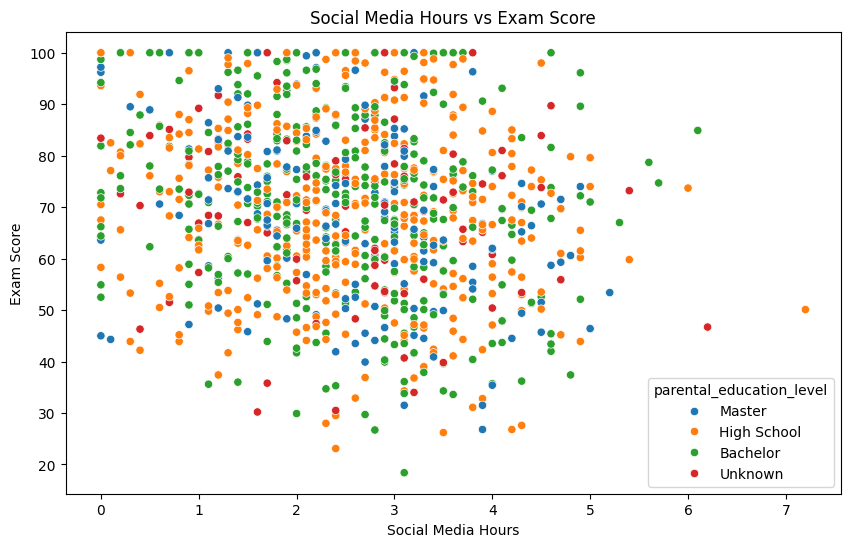

In [42]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=cleaned_dataframe, x='social_media_hours' , y='exam_score' , hue='parental_education_level')
plt.title("Social Media Hours vs Exam Score")
plt.xlabel("Social Media Hours")
plt.ylabel("Exam Score")

plt.savefig('social-media-hours-vs-exam-score.png', dpi=1000)